In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ht,fluids,pint
import CoolProp as cp
from IPython.display import  Latex, Image
ureg = pint.UnitRegistry()
plt.rcParams["font.size"] = "20"

Una barra de área transversal uniforme $A_c=0.1$ m$^2$ y perímetro $per=0.05$ m se coloca en vacío.

Su longitud es de $0.09$ m y su superficie externa puede considerarse adiabática. Durante un tiempo prolongado se transfiere calor en un extremo de la barra, $\dot q(x=0)=100$ watt. El otro extremo se mantiene a una temperatura constante $T(x=L)=20^\circ$C. El material tiene una densidad de $\rho=5000$ kg/m$^3$, capacidad calorífica C_p=500J/kg K y conductividad $k=5$ W/m K.
En estas condiciones, estacionarias, se produce un cambio. para el instante, $t=0$, el calor $\dot q (x=0,t=0)= 0$ watt.

¿Qué tiempo aproximado le lleva a la barra a responder ante el cambio de condiciones de transferencia?
Realice un gráfico para la distribución de temperaturas para $t=0$, $t=\infty$ y para $t=1$ hora.

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ht,fluids,pint
import CoolProp as cp
from IPython.display import  Latex, Image
ureg = pint.UnitRegistry()
plt.rcParams["font.size"] = "20"

In [19]:
A_c = 0.1*ureg.m**2
per = 0.05*ureg.m
L = 0.09*ureg.m
T_L = (20 + 273)*ureg.K
q = (100)*ureg.watt
rho = 5000*ureg.kg/ureg.m**3
C_p = 500*ureg.joule/ureg.kilogram/ureg.kelvin
k = 5*ureg.watt/ureg.meter/ureg.kelvin 
q_0 = 0*ureg.watt

In [37]:
T0 = -q *L / (A_c*k)+T_L
display(Latex(f"Tiempo difusivo: $T(x=0,t=0) =$ {T0.to('degreeC'):.2f}"))

<IPython.core.display.Latex object>

37.85000000000002 <Unit('degree_Celsius')>

In [18]:
a = k / rho / C_p

t_difusivo = (L**2/a)
display(Latex(f'Tiempo difusivo: $\tau_d =$ {t_difusivo.to_base_units():.2f}'))

<IPython.core.display.Latex object>

In [22]:
display(Latex(f'Resistencia térmica metal: {R_T_cond_metal:~.2e}'))
display(Latex(f'Resistencia térmica suelo: {R_T_suelo:~.2f}'))
display(Latex(f'Resistencia térmica convección: {R_T_conveccion:~.2f}'))

R_T_total = 2*(R_T_cond_metal+R_T_conveccion)+R_T_suelo
display(Latex(f'Resistencia térmica total: {R_T_total:~.2f}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [23]:
Q = (Ta_c-Ta_f)/R_T_total
display (Latex(f"Calor transferido, $\dot Q ={Q:~.2f}$"))

<IPython.core.display.Latex object>

In [24]:
#Aproximacion de S

S_approx = Do*L_c / (dist_c-Do)
display(Latex(f'S aproximado: {S_approx:~.2f}'))
display(Latex(f'S calculado: {S:~.2f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [25]:
def resist_termica(dist_c_i):
    S = ht.conduction.S_isothermal_pipe_to_isothermal_pipe(Do, Do, dist_c_i, L_c)
    R_T_suelo = 1/(k_s*S)
    R_T_conveccion = 1 / (h_w*np.pi*L_c*Di)
    R_T_cond_metal = (k_acerog * np.pi*2*L_c/np.log(Do/Di))**-1
    R_T_total = 2*(R_T_cond_metal+R_T_conveccion)+R_T_suelo
    return R_T_total

In [26]:
def resist_termica(dist_c):
    S = ht.conduction.S_isothermal_pipe_to_isothermal_pipe(Do, Do, dist_c, L_c)
    R_T_suelo = 1/(k_s*S)
    R_T_conveccion = 1 / (h_w*np.pi*L_c*Di)
    R_T_cond_metal = (k_acerog * np.pi*2*L_c/np.log(Do/Di))**-1
    R_T_total = 2*(R_T_cond_metal+R_T_conveccion)+R_T_suelo
    return R_T_total

In [27]:
#Gráfico en funcion de dist_c
distancias = np.linspace(1.5*Do,10*Do,50)
Q_i0 = Q
Q_i = np.zeros_like(distancias)*ureg.watt
for i,dist_c_i in enumerate(distancias):
    R_t = resist_termica(dist_c_i)
    Q_i[i] = (Ta_c-Ta_f)/R_t    

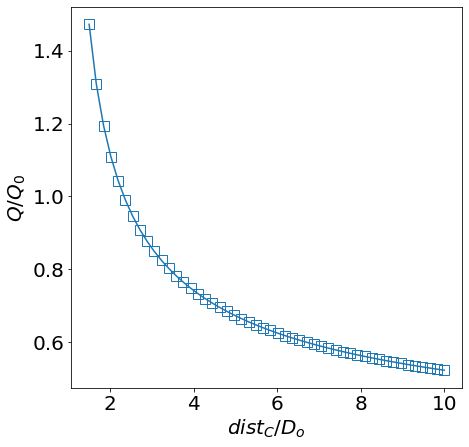

In [29]:
fig0,ax0 = plt.subplots(figsize=(7,7))
ax0.plot(distancias.magnitude/Do.magnitude,Q_i.magnitude/Q_i0.magnitude,'s-',markerfacecolor='None',markersize=10);
ax0.set_xlabel('$dist_C / D_o$',fontsize=20);
ax0.set_ylabel('$Q / Q_0$',fontsize=20);